# Excercises Electric Machinery Fundamentals
## Chapter 8

## Problem 8-10 to Problem 8-11

In [1]:
%pylab notebook
%precision %.4g

Populating the interactive namespace from numpy and matplotlib


### Description

|                                     |                                            |
|-------------------------------------|--------------------------------------------|
| $P_\text{rated} = 30\,hp$           | $I_\text{L,rated} = 110\,A$                |
| $V_T = 240\,V$                      | $n_\text{rated} = 1800\,r/min$             |
| $R_A = 0.19\,\Omega$                | $R_S = 0.02\,\Omega$                       |
| $N_F = 2700 \text{ turns per pole}$ | $N_{SE} = 14 \text{ turns per pole}$       |
| $R_F = 75\,\Omega$                  | $R_\text{adj} = 100\text{ to }400\,\Omega$ |

Rotational losses = 3550 W at full load.

Magnetization curve as shown in Figure P8-1.

<img src="figs/FigC_P8-1.jpg" width="70%">

<hr>
**Note:**
An electronic version of this magnetization curve can be found in file
[p81_mag.dat](data/p81_mag.dat), which can be used with Python programs. Column 1
contains field current in amps, and column 2 contains the internal generated
voltage $E_A$ in volts.
<hr>

For Problems 8-10 to 8-11, the motor is connected cumulatively compounded as shown in Figure P8-4.

<img src="figs/FigC_P8-4.jpg" width="70%">

In [2]:
P_rated =   30  # [hp]
Il_rated = 110  # [A]
Vt =       240  # [V]
Nf =      2700
n_0     = 1800  # [r/min]
Nse =       14
Ra =         0.19 # [Ohm]
Rf =        75    # [Ohm]
Rs =         0.02 # [Ohm]
Radj_max = 400    # [Ohm]
Radj_min = 100    # [Ohm]

## Problem 8-10

### Description

If the motor is connected cumulatively compounded with $R_\text{adj} = 175\,\Omega$:

#### (a)
 * What is the no-load speed of the motor?
 
#### (b)
 * What is the full-load speed of the motor?
 
#### (c)
 * What is its speed regulation?
 
#### (d)
 * Calculate and plot the torque-speed characteristic for this motor. (Neglect armature effects in this problem.)

In [3]:
Radj_10 = 175.0 # [Ohm]

### SOLUTION

At no-load conditions, $E_A = V_T = 240 V$ . The field current is given by:

$$I_F = \frac{V_T}{R_\text{adj}+R_F}$$

In [4]:
If_10 = Vt / (Radj_10+Rf)
If_10

0.96

From Figure P8-1, this field current would produce an internal generated voltage $E_{A_0}$ of 241 V at a speed

In [5]:
n_0

1800

r/min. Therefore, the speed n with a voltage $E_A$ of 240 V would be:

$$\frac{E_A}{E_{A_0}} = \frac{n}{n_0}$$

In [6]:
Ea0_10_nl = 241.0 # [V]
Ea_10_nl = 240.0 # [V]
n_10_nl = Ea_10_nl / Ea0_10_nl * n_0
print('''
n_10_nl = {:.1f} r/min
======================'''.format(n_10_nl))


n_10_nl = 1792.5 r/min


At full load, the armature current is:

$$I_A = I_L - I_F = I_L - \frac{V_T}{R_\text{adj}+R_F}$$

In [7]:
Ia_10 = Il_rated - Vt/(Radj_10 + Rf)
Ia_10

109

The internal generated voltage $E_A$ is:

$$E_A = V_T - I_A (R_A+R_S)$$

In [8]:
Ea_10_fl = Vt - Ia_10*(Ra+Rs)
Ea_10_fl

217.1

The equivalent field current is:

$$I_F^* = I_F + \frac{N_{SE}}{N_F}I_A$$

In [9]:
If_10_ = If_10 + Nse/Nf * Ia_10
If_10_

1.525

From Figure P8-1, this field current would produce an internal generated voltage $E_{A_0}$ of 279 V at a speed

In [10]:
n_0

1800

In [11]:
Ea0_10_fl = 279.0 # [V]
n_10_fl =  Ea_10_fl / Ea0_10_fl * n_0
print('''
n_10_fl = {:.1f} r/min
======================'''.format(n_10_fl))


n_10_fl = 1400.7 r/min


The speed regulation is:

$$SR = \frac{n_\text{nl}-n_\text{fl}}{n_\text{fl}}$$

In [12]:
SR = (n_10_nl - n_10_fl) / n_10_fl
print('''
SR = {:.1f} %
==========='''.format(SR*100))


SR = 28.0 %


The torque-speed characteristic can best be plotted with a Python program. An appropriate program is
shown below.

Get the magnetization curve. Note that this curve is defined for a speed of 1200 r/min.

In [13]:
#Load the magnetization curve data
import pandas as pd
# The data file is stored in the repository
fileUrl = 'data/p81_mag.dat'
data = pd.read_csv(fileUrl,     # the address where to download the datafile from
                   sep=' ',     # our data source uses a blank space as separation
                   comment='%', # ignore lines starting with a "%" 
                   skipinitialspace = True,  # ignore intital spaces
                   header=None, # we don't have a header line defined...
                   names=['If_values', 'Ea_values'] # ...instead we define the names here
                   ) 

First, initialize the values needed in this program.

In [14]:
Radj_10 = 175.0 # [Ohm]
Il_10 = linspace(0, 110, 111)

Calculate the armature current for each load

In [15]:
Ia_10 = Il_10 - Vt / (Rf + Radj_10)

Now calculate the internal generated voltage for each armature current.

In [16]:
Ea_10 = Vt - Ia_10*(Ra+Rs)

Calculate the effective field current with and without armature reaction. 

In [17]:
If_10 = Vt / (Rf + Radj_10) + Nse/Nf * Ia_10

Calculate the resulting internal generated voltage at 1800 r/min by interpolating the motor's magnetization curve.

In [18]:
Eao_10 = interp(If_10,data['If_values'],data['Ea_values'])

Calculate the resulting speed from Equation (8-13)

In [19]:
n_10 = ( Ea_10 / Eao_10 ) * n_0

Calculate the induced torque corresponding to each speed from Equation (8-10).

In [20]:
tau_ind_10 = Ea_10 * Ia_10 / (n_10 * 2 * pi / 60)

Plot the torque-speed curves

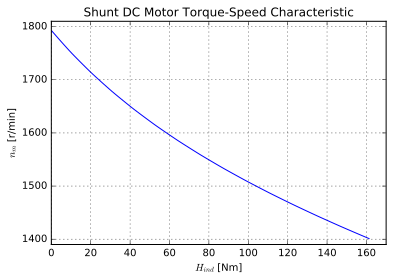

In [21]:
title(r'Shunt DC Motor Torque-Speed Characteristic')
xlabel(r'$\tau_{ind}$ [Nm]')
ylabel(r'$n_m$ [r/min]')
axis([ 0, 170 ,1390,1810])   #set the axis range
plot(tau_ind_10,n_10)
grid()

## Problem 8-11

### Description

The motor is connected cumulatively compounded and is operating at full load.

 * What will the new speed of the motor be if $R_\text{adj}$ is increased to $250\,\Omega$ ? 
 * How does the new speed compared to the full-load speed calculated in Problem 8-10?

In [22]:
Radj_11 = 250.0 # [Ohm]

### SOLUTION

If $R_\text{adj}$ is increased to $250\,\Omega$ , the field current is given by:

In [23]:
If_11 = Vt / (Radj_11+Rf)
If_11

0.7385

At full load conditions, the armature current is:

In [24]:
Ia_11 = Il_rated - Vt/(Radj_11 + Rf)
Ia_11

109.3

The internal generated voltage $E_A$ is:

In [25]:
Ea_11 = Vt - Ia_11*(Ra+Rs)
Ea_11

217.1

The equivalent field current is:

In [26]:
If_11_ = If_11 + Nse/Nf * Ia_11
If_11_

1.305

From Figure P8-1, this field current would produce an internal generated voltage $E_{A_0}$ of 268 V at a speed

In [27]:
n_0

1800

r/min. Therefore, the speed n with a voltage $E_A$ of 240 V would be:

In [28]:
Ea0_11 = 268.0 # [r/min]
Ea_11 = Ea_10_fl
n_11 = Ea_11 / Ea0_11 * n_0
print('''
n_11 = {:.1f} r/min
==================='''.format(n_11))


n_11 = 1458.1 r/min


**The new full-load speed is higher than the full-load speed in Problem 8-10.**